In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')

In [ ]:
1 box plots

2 corr

3 scatters

4 pca 

<AxesSubplot:xlabel='Position', ylabel='Base Salary'>

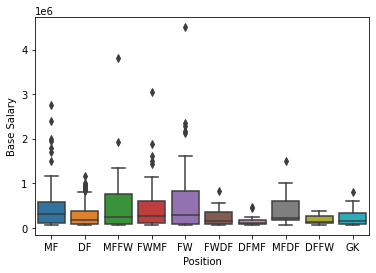

In [30]:
sns.boxplot(x ='Position', y='Base Salary',data=df)

##Insight - 
- We see 75 % of all position groups pay are below 100,000.
- There are more high paid Midfielders than any other position(shown as the outliers in the graph)  
- defenders and goal keepers have the lowest mean pay out of the groups. 

In [26]:
df = pd.read_csv('../data/final_per_90_and_pAdj.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Columns: 110 entries, fb_id to attacking_touches
dtypes: float64(101), int64(1), object(8)
memory usage: 606.0+ KB


## Feature vizual exploration 

- with the data now scaled to per 90 and possesion adjusted key features are to be visualised and observed below to looks for trends. 

In [42]:
# create defender only df 
defenders = df.loc[(df['Position']=='DF')&( df['Nineties'] >1)]

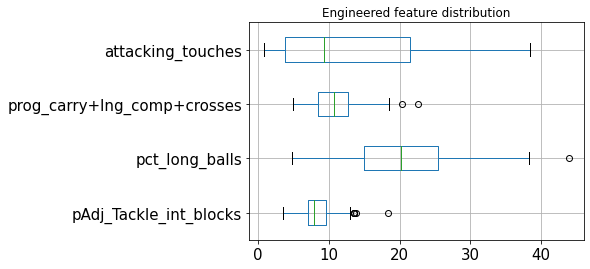

In [43]:
#use boxplot to observe outliers - key for anamoly dection 


boxplot = defenders[[
    # feature generated 
    'pAdj_Tackle_int_blocks','pct_long_balls','prog_carry+lng_comp+crosses','attacking_touches',

]].boxplot(grid = True,vert=False,fontsize=15).set(title='Engineered feature distribution')


plt.show()


In [46]:
#summary stats table transposed for df

# put higher up and show key features 
defenders[['pAdj_Tackle_int_blocks','avg_shrt+med_pass_pct','pct_long_balls','prog_carry+lng_comp+crosses','attacking_touches']].describe().T

,count,mean,std,min,25%,50%,75%,max
pAdj_Tackle_int_blocks,211.0,8.296044,2.140409,3.565018,7.057353,7.965396,9.612172,18.429358
avg_shrt+med_pass_pct,211.0,88.878910,4.454654,66.300000,86.350000,89.150000,92.500000,97.400000
pct_long_balls,211.0,20.360878,6.856545,4.864865,14.975258,20.202020,25.356094,43.854749
prog_carry+lng_comp+crosses,211.0,10.695172,2.941749,5.000000,8.494210,10.774194,12.698233,22.636364
attacking_touches,211.0,12.998068,9.883662,0.882353,3.846549,9.393939,21.483984,38.461538


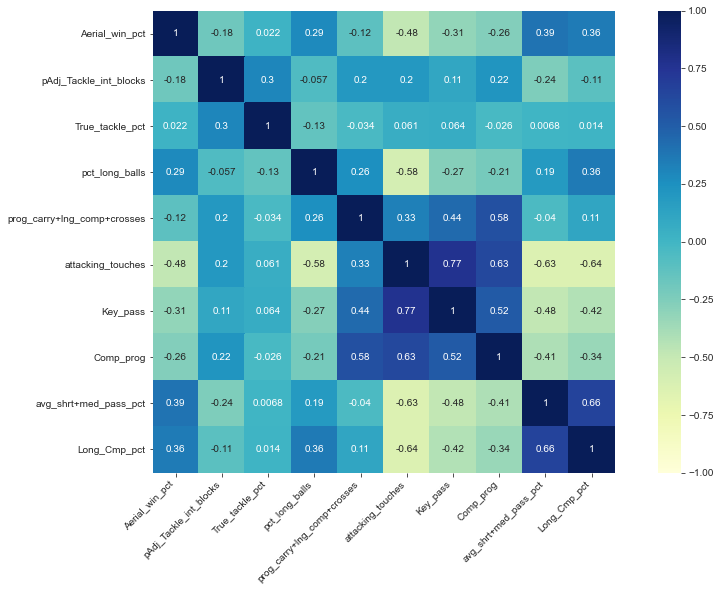

In [92]:
corr = defenders[['Aerial_win_pct','pAdj_Tackle_int_blocks','True_tackle_pct','pct_long_balls','prog_carry+lng_comp+crosses','attacking_touches','Key_pass',
 'Comp_prog','avg_shrt+med_pass_pct','Long_Cmp_pct']].corr()

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 8.5)

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
    cmap="YlGnBu",annot=True,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



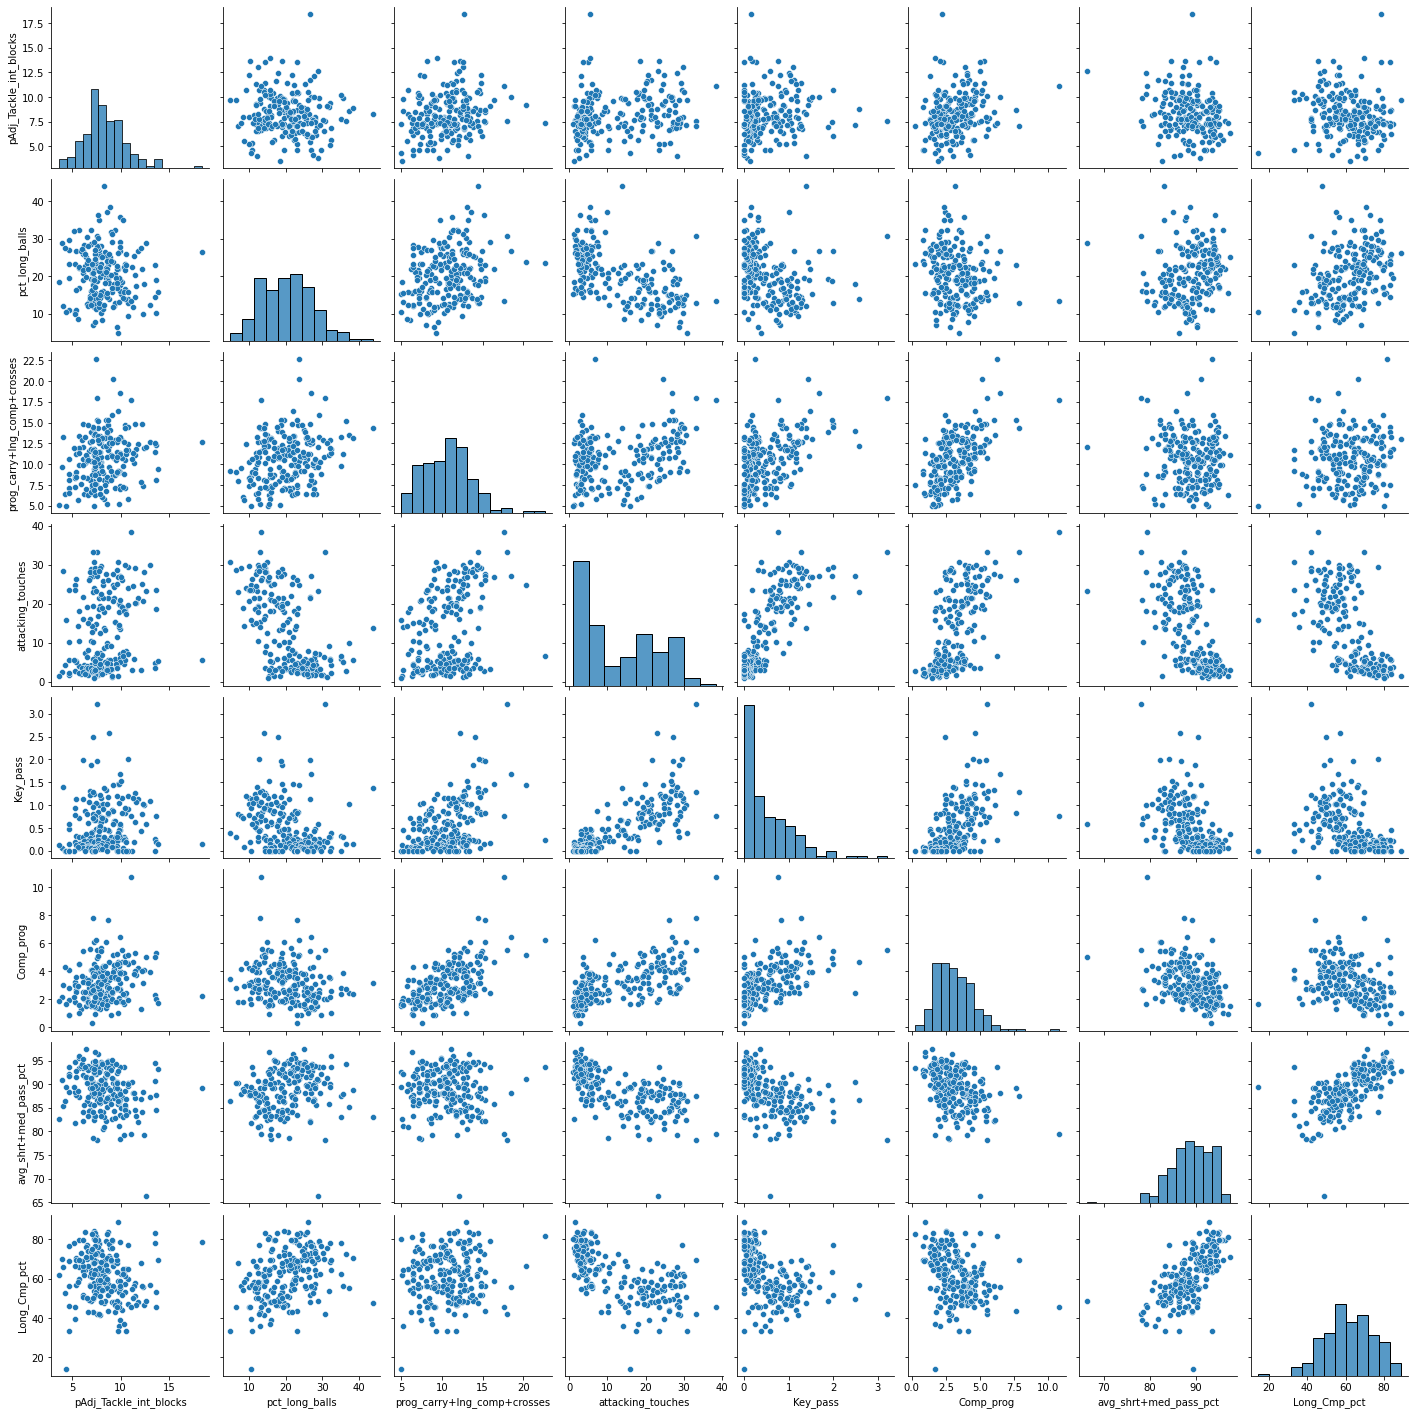

In [49]:
data =defenders[['pAdj_Tackle_int_blocks','pct_long_balls','prog_carry+lng_comp+crosses','attacking_touches','Key_pass',
 'Comp_prog','avg_shrt+med_pass_pct','Long_Cmp_pct']]
sns.pairplot(data)

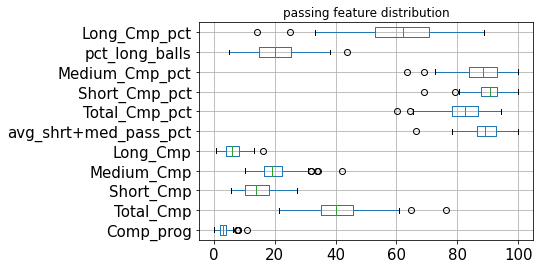

In [31]:
data = defenders[[ 'Comp_prog',
 'Total_Cmp',
    'Short_Cmp',
     'Medium_Cmp',
    'Long_Cmp',

    'avg_shrt+med_pass_pct',
 'Total_Cmp_pct',
    'Short_Cmp_pct',
    'Medium_Cmp_pct',
     'pct_long_balls',
    'Long_Cmp_pct',
 ]]

boxplot = data.boxplot(grid = True,vert=False,fontsize=15).set(title='passing feature distribution')


plt.show()

# Passing features 

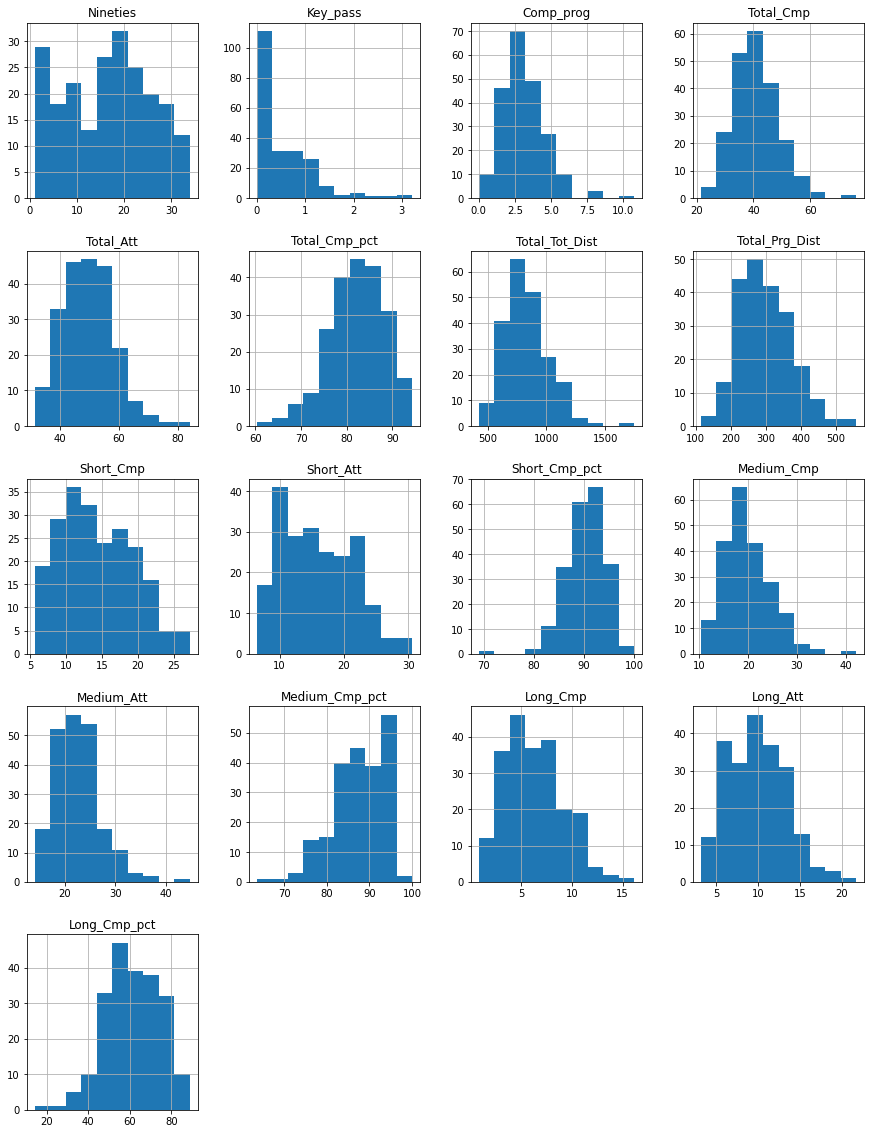

In [48]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
hist = defenders[['player_name',
 'Nineties',
 'Key_pass',
 'Comp_prog',
 'Total_Cmp',
 'Total_Att',
 'Total_Cmp_pct',
 'Total_Tot_Dist',
 'Total_Prg_Dist',
 'Short_Cmp',
 'Short_Att',
 'Short_Cmp_pct',
 'Medium_Cmp',
 'Medium_Att',
 'Medium_Cmp_pct',
 'Long_Cmp',
 'Long_Att',
 'Long_Cmp_pct']].hist(bins=10, ax=ax )


Passing attempt features have distinctly right tailed data and are skewed to the left,
 and passing pct features have left tails and are skewed to the right.

 Both of these observations are to be expected in the data as only few players will have a large amount of the different kind of attempts. There is also a basic threshold for completion percentage among players in the league for the various pass types. 

filering out players with less than 5 games could possibly change graphs. 

When comparing the completion pct features, long comp pct is the closest to being normally distributed. There are only a few players at the high completion percentages for long balls creating a left handed tail. The mode for short and medium pct due to is in the mid 90's while long balls are in the 50s. 
 

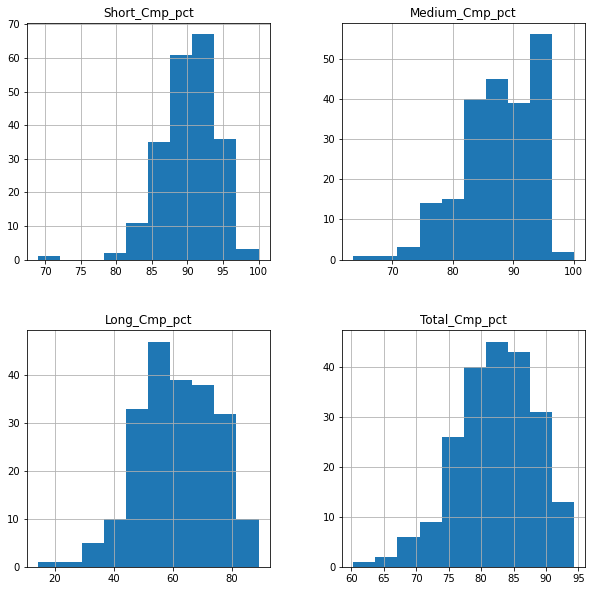

In [55]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
hist = defenders[['Short_Cmp_pct','Medium_Cmp_pct','Long_Cmp_pct','Total_Cmp_pct']].hist(bins=10,ax=ax)
plt.show()

Expected Assists and short completions and sort attempts have a positive corelation of 0.58	and 0.61 respectivly. 
interestinly xA and short comp percent have .25 % negative correlation, this could point to trying to slot lots of short passes into dangerous areas that may not always be completed results in more expected assists than just lots of completed short passes that do not create shoring changes. Other features correlation to xA and xG can be followed up. 

2. DATA RELATIONSHIPS
Investigating variable relationships through covariance matrices and other analysis methods is essential for not only evaluating the planned modeling strategy but also allows you to understand your data further. Below, we calculated the correlation coefficients for each variable in the data frame and then fed those correlations into a heatmap for ease of interpretation

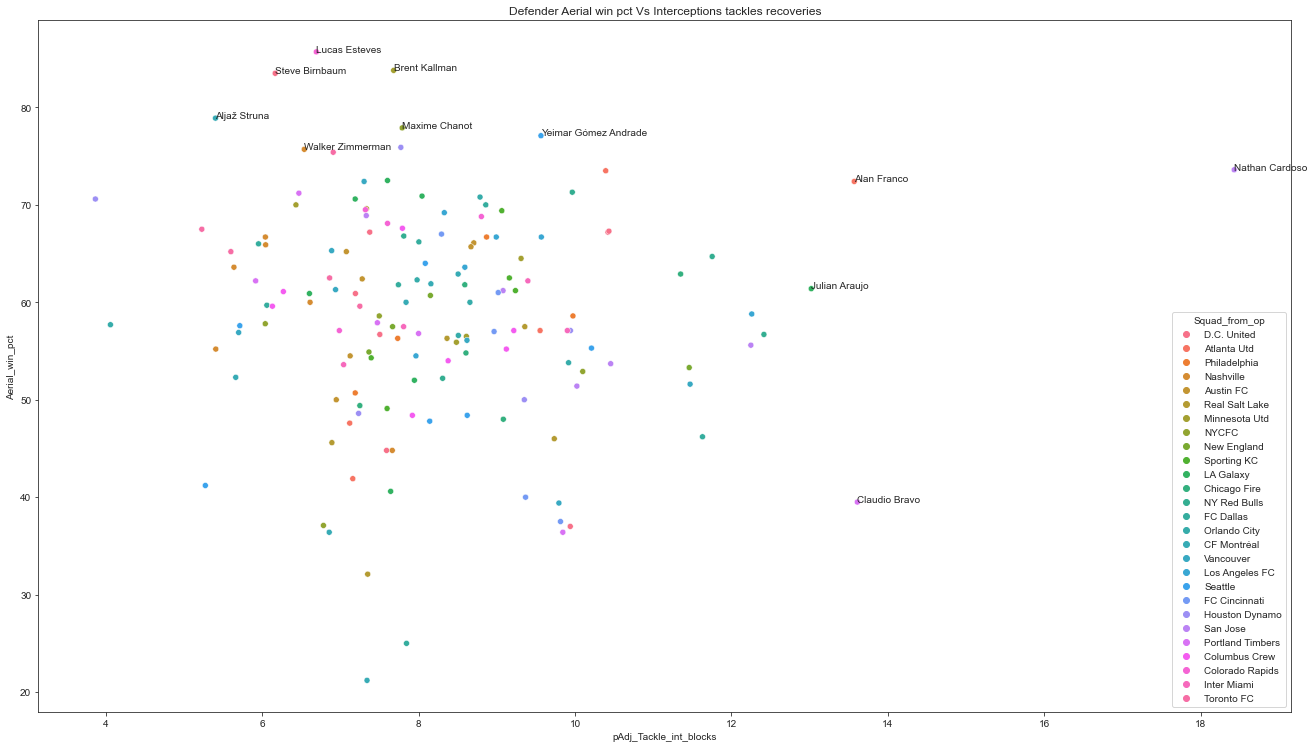

In [107]:
graph = defenders.loc[(df['pAdj_Tackle_int_blocks']<35)&(df['Position']=='DF')&(df['Aerial_win_pct']<100)&
               (df['Aerial_win_pct']>0)&(df['Nineties']>10)]


sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)


x =graph['pAdj_Tackle_int_blocks']
y = graph['Aerial_win_pct']

p = graph['player_name']

g = sns.scatterplot(data=graph, x =x, y=y ,hue='Squad_from_op',
                ax=ax).set(title='Defender Aerial win pct Vs Interceptions tackles recoveries')



for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 77:
         plt.annotate(p, (x, y))
    if x > 13:
        plt.annotate(p,(x,y))

plt.tight_layout()

### Walker Zimmerman is in the top of the graph but not the right of the graph of the graph showing he doesnt need to have a tone of interceptions tackles and recoveries to be at the best defender

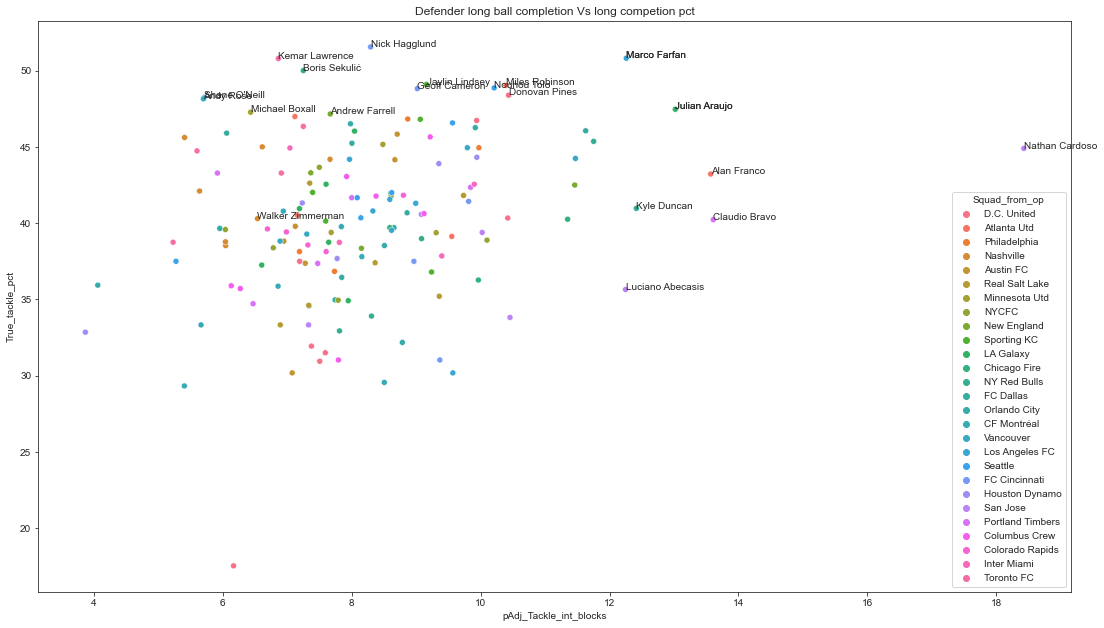

In [108]:

graph = defenders.loc[(df['Position']=='DF')&(df['Nineties']>10)]

sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# plt.gca().invert_xaxis()
# plt.xticks(rotation = 90)


x = graph['pAdj_Tackle_int_blocks']
y = graph['True_tackle_pct']
p = graph['player_name']

g = sns.scatterplot(data=graph, x=x,y =y,hue='Squad_from_op',
                ax=ax).set(title='Defender long ball completion Vs long competion pct')


for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 47:
         plt.annotate(p, (x, y))
    if x > 12:
        plt.annotate(p,(x,y))
        
    
    

# plt.tight_layout()

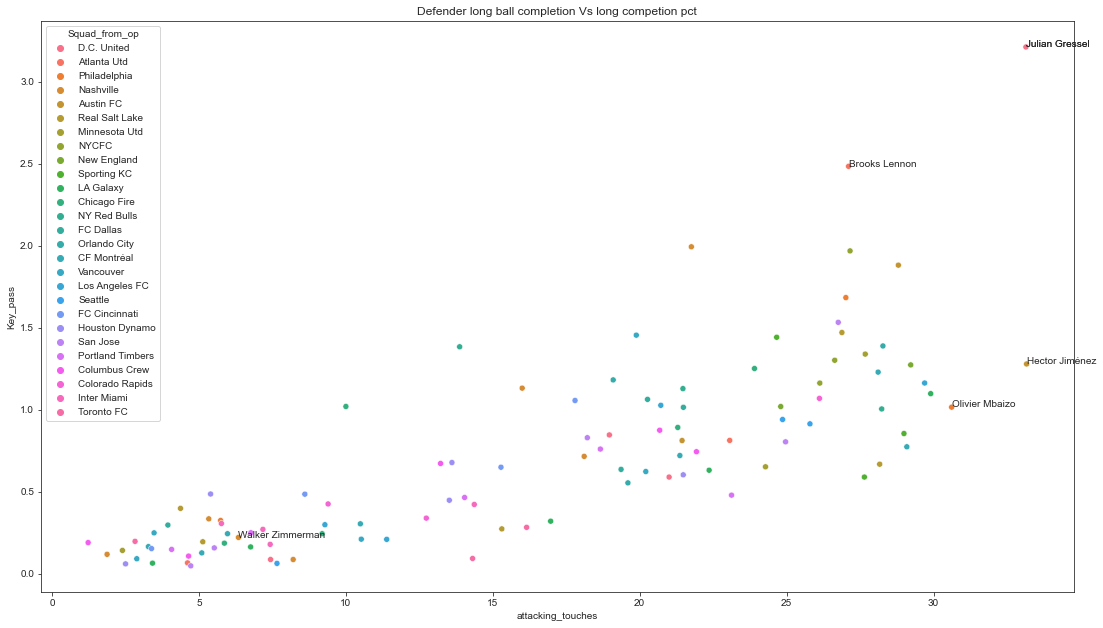

In [103]:

graph = df.loc[(df['Crosses']>.1)&(df['Position']=='DF')&(df['Nineties']>10)]

sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# plt.gca().invert_xaxis()
# plt.xticks(rotation = 90)


x = graph['attacking_touches']
y = graph['Key_pass']
p = graph['player_name']

g = sns.scatterplot(data=graph, x='attacking_touches',y ='Key_pass',hue='Squad_from_op',
                ax=ax).set(title='Defender long ball completion Vs long competion pct')


for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 2:
         plt.annotate(p, (x, y))
    if x > 30:
        plt.annotate(p,(x,y))
        
    
    

# plt.tight_layout()

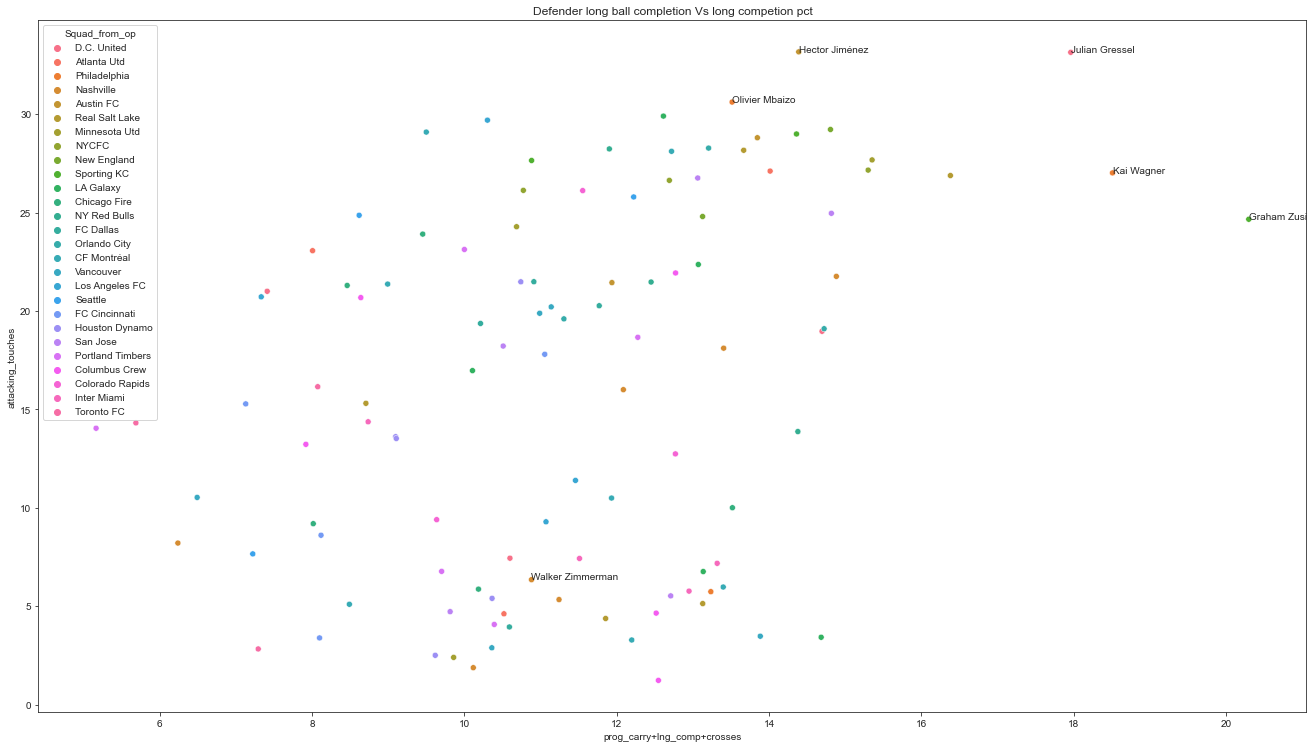

In [96]:

graph = df.loc[(df['Crosses']>.1)&(df['Position']=='DF')&(df['Nineties']>10)]

sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# plt.gca().invert_xaxis()
# plt.xticks(rotation = 90)


x = graph['prog_carry+lng_comp+crosses']
y = graph['attacking_touches']
p = graph['player_name']

g = sns.scatterplot(data=graph, x='prog_carry+lng_comp+crosses',y ='attacking_touches',hue='Squad_from_op',
                ax=ax).set(title='Defender long ball completion Vs long competion pct')


for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 30:
         plt.annotate(p, (x, y))
    if x > 18:
        plt.annotate(p,(x,y))
        
    
    

plt.tight_layout()

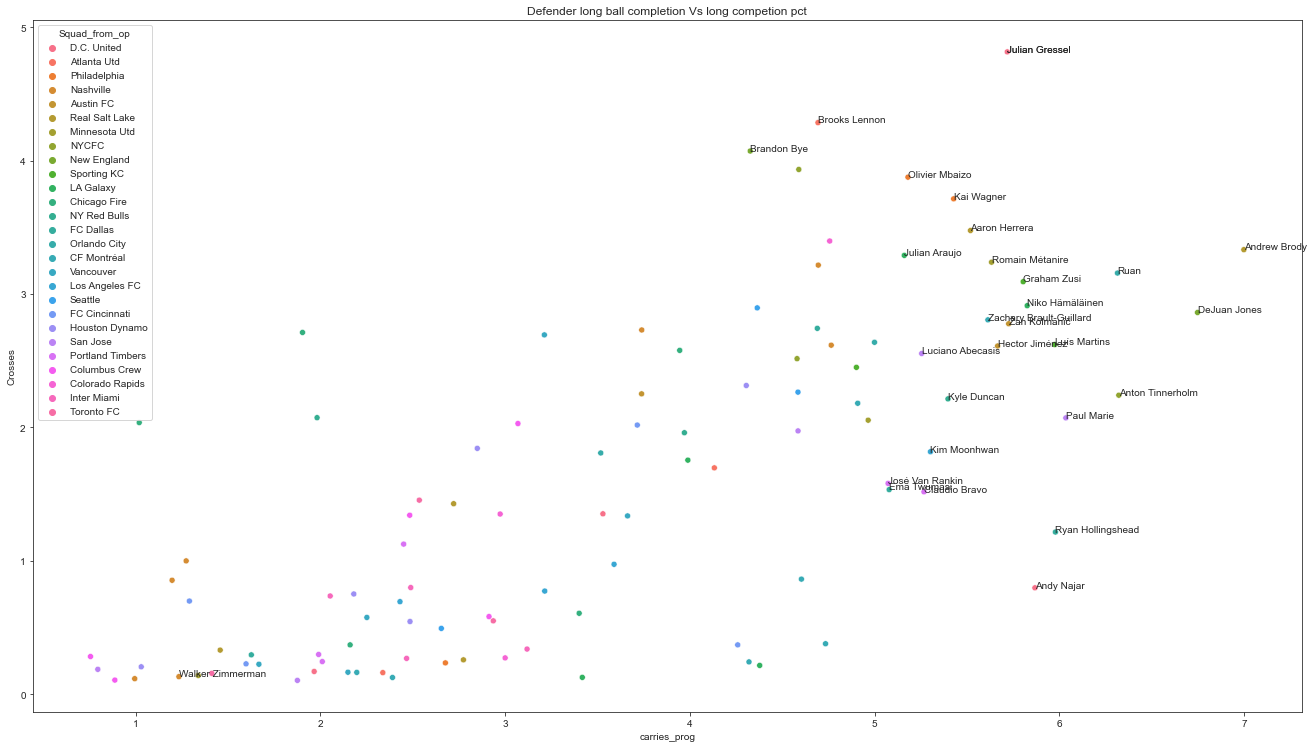

In [77]:

graph = df.loc[(df['Crosses']>.1)&(df['Position']=='DF')&(df['Aerial_win_pct']<100)&
               (df['Aerial_win_pct']>0)&(df['Nineties']>10)]

sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# plt.gca().invert_xaxis()
# plt.xticks(rotation = 90)


g = sns.scatterplot(data=graph, x='carries_prog',y ='Crosses',hue='Squad_from_op',
                ax=ax).set(title='Defender long ball completion Vs long competion pct')

x = graph['carries_prog']
y = graph['Crosses']
p = graph['player_name']

for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 4:
         plt.annotate(p, (x, y))
    if x > 5:
        plt.annotate(p,(x,y))
        
    
    

plt.tight_layout()

### Walker is in the bottom left of this graph showing he does not carry or cross the ball in his role in the cener of the defense 


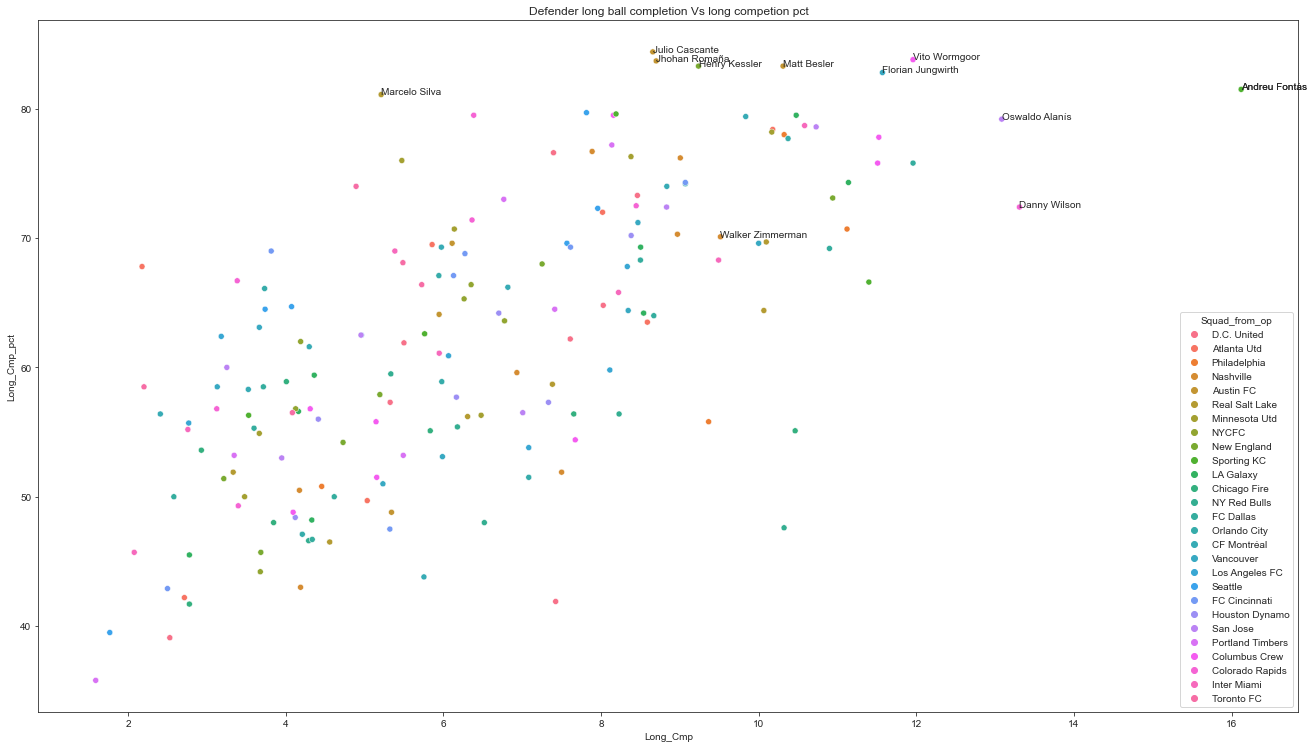

In [82]:
graph = df.loc[(df['pAdj_Tackle_int_blocks']<35)&(df['Position']=='DF')&(df['Aerial_win_pct']<100)&
               (df['Aerial_win_pct']>0)&(df['Nineties']>5)]

sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# plt.gca().invert_xaxis()
# plt.xticks(rotation = 90)


g = sns.scatterplot(data=graph, x ='Long_Cmp', y='Long_Cmp_pct',hue='Squad_from_op',
                ax=ax).set(title='Defender long ball completion Vs long competion pct')


x = graph['Long_Cmp']
y = graph['Long_Cmp_pct']
p = graph['player_name']
for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 80:
         plt.annotate(p, (x, y))
    if x > 12:
        plt.annotate(p,(x,y))
    
    
plt.tight_layout()

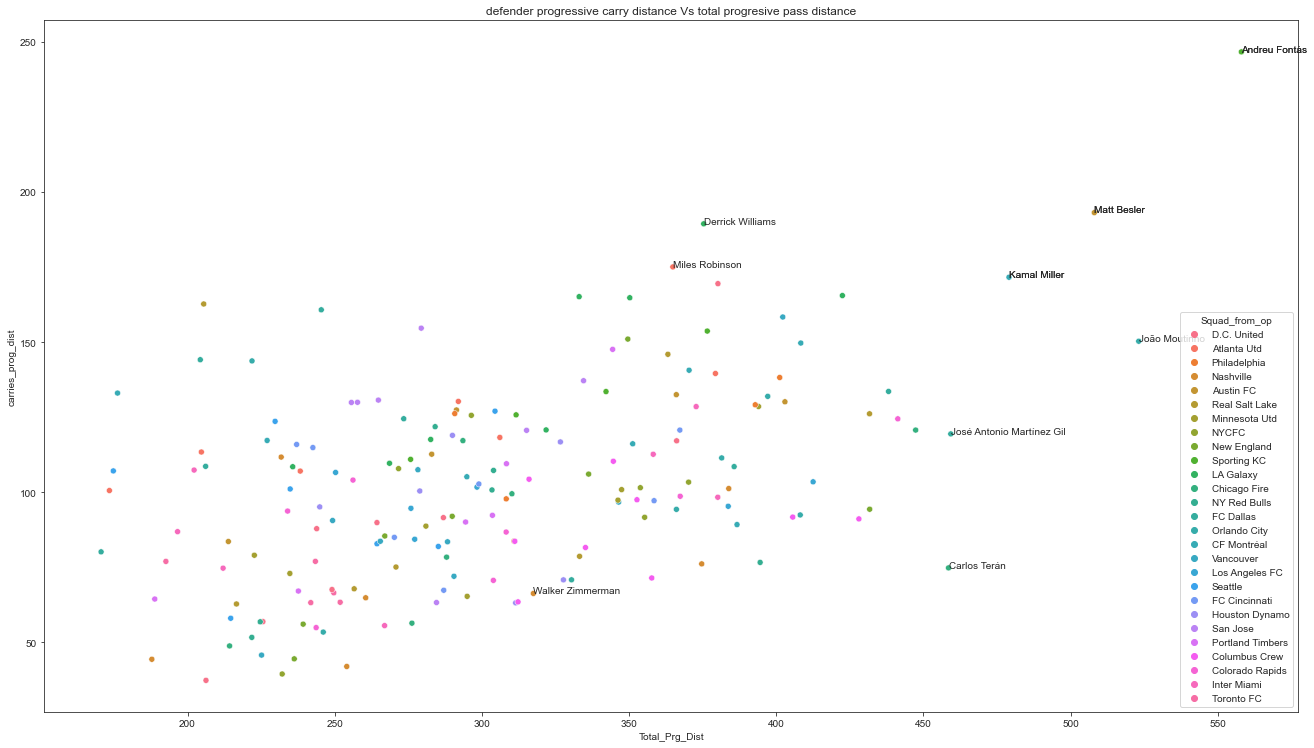

In [84]:
graph = df.loc[(df['pAdj_Tackle_int_blocks']<35)&(df['Position']=='DF')&(df['Aerial_win_pct']<100)&
               (df['Aerial_win_pct']>0)&(df['Nineties']>5)]
sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# plt.gca().invert_xaxis()
# plt.xticks(rotation = 90)


g = sns.scatterplot(data=graph, x ='Total_Prg_Dist', y='carries_prog_dist',hue='Squad_from_op',
                ax=ax).set(title='defender progressive carry distance Vs total progresive pass distance')

x = graph['Total_Prg_Dist']
y = graph['carries_prog_dist']
p = graph['player_name']
for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 170:
         plt.annotate(p, (x, y))
    if x > 450:
        plt.annotate(p,(x,y))
    
    
plt.tight_layout()


In [ ]:
corr = df1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
# ax = df.plot(kind='scatter',x='x',y='y')
# df[['x','y','lbl']].apply(lambda row: ax.text(*row),axis=1);

ax = df1.plot(kind='scatter',x='win/90', y ='GD' )
df1[['win/90','GD' ,'Squad']].apply(lambda row: ax.text(*row),axis=1)

In [ ]:
## viz group by columns 

spm.reindex(index=spm.mean(axis=1).sort_values(ascending=False).index).plot(
kind='barh',figsize=(10,10))
plt.xlabel('Price')


In [ ]:
2.6.3.5.2 Distribution of weekday and weekend price by state
Next, you can transform the data into a single column for price with a new categorical column that represents the ticket type.

#Code task 15#
#Use the pd.melt function, pass in the ski_data columns 'state', 'AdultWeekday', and 'Adultweekend' only,
#specify 'state' for `id_vars`
#gather the ticket prices from the 'Adultweekday' and 'AdultWeekend' columns using the `value_vars` argument,
#call the resultant price column 'Price' via the `value_name` argument,
#name the weekday/weekend indicator column 'Ticket' via the `var_name` argument
ticket_prices = pd.melt(ski_data[['state','AdultWeekday','AdultWeekend']], 
                        id_vars='state',
              var_name='Ticket',
              value_vars=['AdultWeekday','AdultWeekend'],
              value_name='Price')



This is now in a format we can pass to seaborn's boxplot function to create boxplots of the ticket price distributions for each ticket type for each state.

#Code task 16#
#Create a seaborn boxplot of the ticket price dataframe we created above,
#with 'state' on the x-axis, 'Price' as the y-value, and a hue that indicates 'Ticket'
#This will use boxplot's x, y, hue, and data arguments.
plt.subplots(figsize=(12, 8))
sns.boxplot(x='state', y='Price', hue='Ticket', data=ticket_prices)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('State');

In [ ]:
plt.figure(10,12)
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu"annot=True)
plt.yticks(rotation=0)


# can also look at variable distributions and correlations with pairplots

g = sns.pairplot(df)



3. IDENTIFYING AND CREATING FEATURES
Variables and features are almost synonymous. The primary difference tends to be the context in which they are used; in machine learning, it is common practice to identify predictive features in your data whereas in parametric statistics, features are often referred to as variables and variables can include the response variable which you predict with your model.

The goal of identifying features is to use your exploratory work to isolate features that will be most helpful in constructing a predictive model. In addition to recognizing those features, it often behooves one to create additional features for inclusion in your predictive modeling work.
Once you have identified the critical features for your model development, you may realize you need to create additional features to augment your original data. You can do this through the development of combining features or revaluing them to emphasize specific relationships. Additional features can also be created through Principal Components Analysis or Clustering.

Building a Principle Components Analysis (PCA) is a useful way to apply a dimension reduction application to identify which features contain the most amount of variation within your development dataset. The predictive model can be constructed on the principal components themselves as features, resulting in feature reduction. Feature reduction is helpful when your data set has too many features to choose from, and you need a more automated way to reduce the number of input features for modeling. There are different flavors of dimension reduction methods based on multi-dimensional scaling, such as Principal Coordinate Analysis. Lasso regression is another tool for a semi-automated feature selection approach. Review these methods to determine the best strategy for your project.


Clustering (e.g. K-means clustering) is an excellent exploratory analysis method for creating additional features which in this case would be the clusters themselves. The clusters can be used in conjunction with additional features if you find them to be valid after review.

In [69]:
## if I want to cut this down

              
dfs = df.loc[(df['Position']=='DF')
#              &(df['Aerial_win_pct']<100)&
#                (df['Aerial_win_pct']>0)
             &(df['Nineties']>15)&(df['True_tackle_pct']>5)] 

In [57]:
names = defenders['player_name']

In [53]:
def_stats = defenders[[ 'pAdj_Total_tackles', 'pAdj_Tackles_Won', 'pAdj_Tackles_Def_3rd',
       'pAdj_Tackles_Mid_3rd', 'pAdj_Tackles_Att_3rd',
       'pAdj_Num_Dribblers_tackled', 'pAdj_Num_Dribbled_past',
       'pAdj_total_pressing', 'pAdj_Won_ball_5_sec',  'pAdj_Blocks',
       'pAdj_Interceptions', 'pAdj_Clearences',
       'pAdj_Yellow_cards', 
       'pAdj_Fouls', 'pAdj_def_interceptions',
        'pAdj_PK_conceded',
       'pAdj_Recoveries', 'pAdj_Aerial_Duels_lost',
       'True_tackle_pct', 'pAdj_Tackle_int_blocks']]

In [64]:
def_stats_scale = scale(def_stats)
def_scaled_df = pd.DataFrame(def_stats_scale, columns=def_stats.columns)
def_scaled_df.std(ddof=0).head()

pAdj_Total_tackles      1.0
pAdj_Tackles_Won        1.0
pAdj_Tackles_Def_3rd    1.0
pAdj_Tackles_Mid_3rd    1.0
pAdj_Tackles_Att_3rd    1.0
dtype: float64

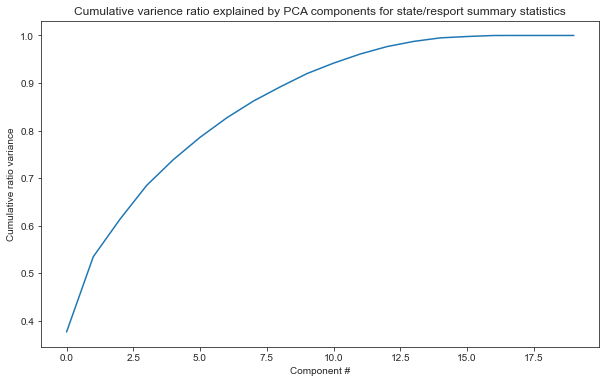

In [65]:
def_pca = PCA().fit(def_stats_scale)

plt.subplots(figsize=(10, 6))
plt.plot(def_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative varience ratio explained by PCA components for state/resport summary statistics');

In [66]:

def_pca_x = def_pca.transform(def_stats_scale)
def_pca_df = pd.DataFrame(def_pca_x[:,:2])


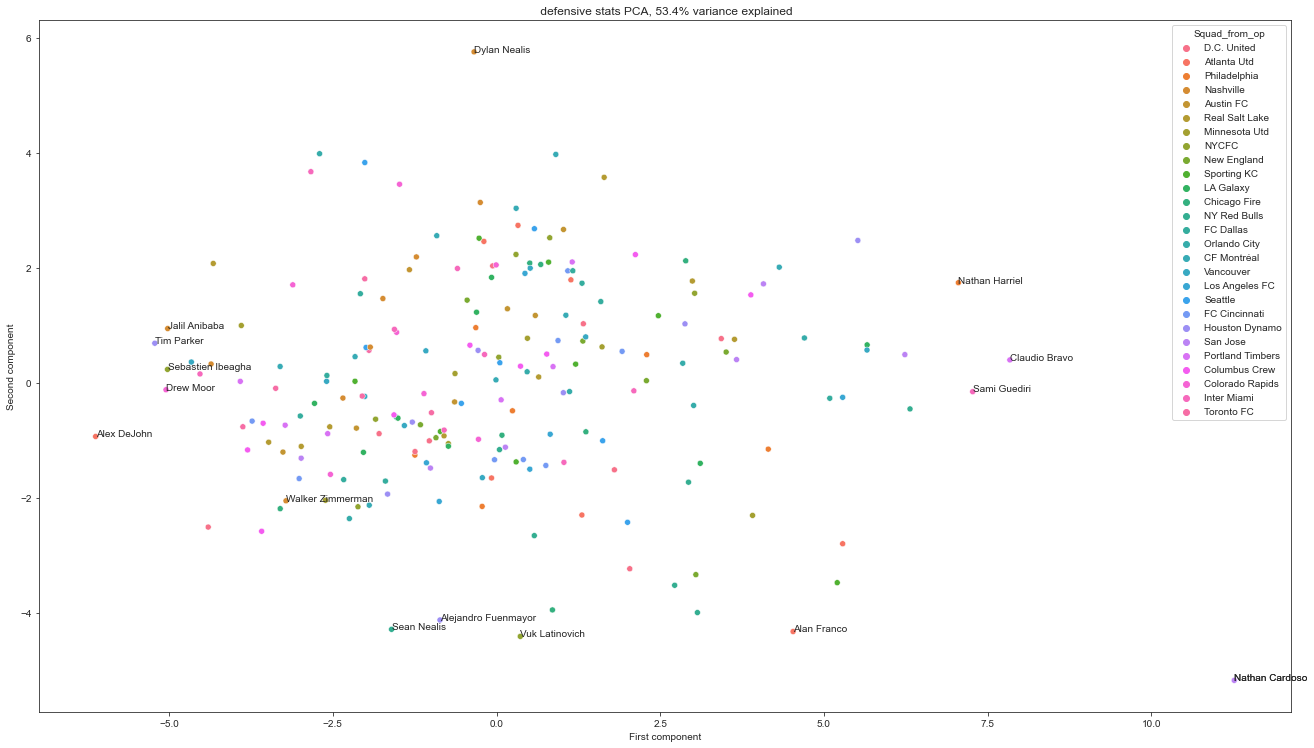

In [67]:
def_pca_df = pd.DataFrame(def_pca_x[:,:2])
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
data = def_pca_x[:,0:2]
x = def_pca_x[:, 0]
y = def_pca_x[:, 1]
p = names
c = defenders['Squad_from_op']


pc_var = 100 * def_pca.explained_variance_ratio_.cumsum()[1]
g = sns.scatterplot(data=def_pca_df, x =x, y=y,hue=c, ax=ax)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f' defensive stats PCA, {pc_var:.1f}% variance explained')

for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 4 or y<-4:
         plt.annotate(p, (x, y))
    if x > 7 or x< -5:
        plt.annotate(p,(x,y))

plt.tight_layout()

In [ ]:
## next section with att stats 


In [70]:
att_stats = defenders[['Nineties', 'xA',
       'Key_pass', 'Comp_prog', 
        'Total_Prg_Dist', 'Short_Cmp', 'Short_Att',
       'Short_Cmp_pct', 'Medium_Cmp', 'Medium_Att', 'Medium_Cmp_pct',
       'Long_Cmp', 'Long_Att', 'Long_Cmp_pct', 'touches',
       'touches_mid_3rd',
       'touches_att_3rd', 'touches_att_box', 'dribble_Succ',
       'dribble_Att', 'dribble_Succ_pct', 'num_dribble_past',
       'dribble_megs', 'carries', 'carries_prog_dist',
       'carries_prog', 'carries_att_3rd', 'carries_att_box',
       'miss_control', 'dispossed', 'recep_targ', 'recep_succ',
       'recept_pct', 'Fouls_drawn', 'Offsides', 'Crosses', 'PK_won',
       'Aerial_win_pct', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90',
       'G/Sh', 'G/SoT', 'xG', 'npxG',
       'npxG/Sh', 'np:G-xG']]

In [71]:
att_stats_scale = scale(att_stats)
att_scaled_df = pd.DataFrame(att_stats_scale, columns=att_stats.columns)
att_scaled_df.std(ddof=0).head(2)

Nineties    1.0
xA          1.0
dtype: float64

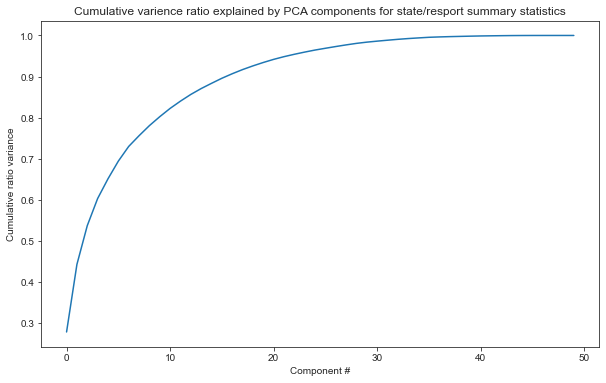

In [73]:
att_pca = PCA().fit(att_stats_scale)
att_pca_x = att_pca.transform(att_stats_scale)

plt.subplots(figsize=(10, 6))
plt.plot(att_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative varience ratio explained by PCA components for state/resport summary statistics');

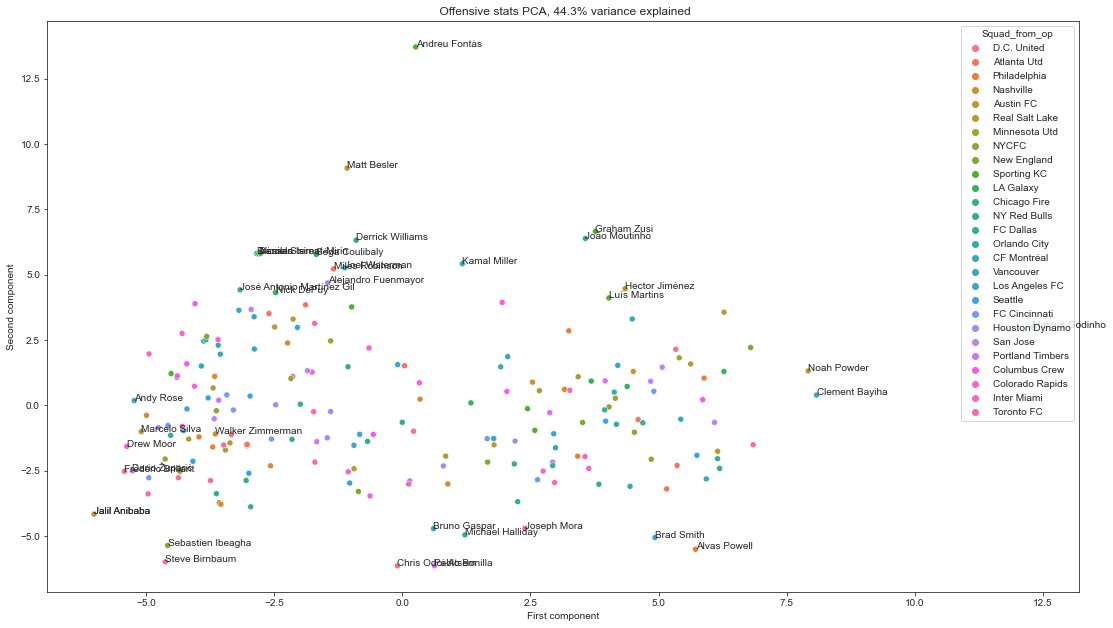

In [76]:
att_pca_df = pd.DataFrame(att_pca_x[:,:2])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
data = att_pca_x[:,0:2]
x = att_pca_x[:, 0]
y = att_pca_x[:, 1]
p = names
c = defenders['Squad_from_op']

pc_var = 100 * att_pca.explained_variance_ratio_.cumsum()[1]
g = sns.scatterplot(data=att_pca_df, x =x, y=y,hue=c, ax=ax)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f' Offensive stats PCA, {pc_var:.1f}% variance explained')

for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 4 or y<-4:
         plt.annotate(p, (x, y))
    if x > 7 or x< -5:
        plt.annotate(p,(x,y))
    